# Descriptive Statistics for Reddit Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

In [2]:
df = pd.read_csv("../data/reddit_preprocessed.csv")
df.head()

,title,selftext,score,created_utc,subreddit,text,clean_text,processed_text
0,A new study across 11 African reserves found t...,NaN,1010,1.749149e+09,science,A new study across 11 African reserves found t...,a new study across african reserves found that...,new study african reserve find dehorn rhino cu...
1,Low-calorie diets might increase risk of depre...,NaN,3031,1.749118e+09,science,Low-calorie diets might increase risk of depre...,lowcalorie diets might increase risk of depres...,lowcalorie diet increase risk depression overw...
2,People around the world are more likely to fav...,NaN,957,1.749125e+09,science,People around the world are more likely to fav...,people around the world are more likely to fav...,people world likely favor dominant authoritari...
3,Self-perceived physical attractiveness linked ...,NaN,180,1.749150e+09,science,Self-perceived physical attractiveness linked ...,selfperceived physical attractiveness linked t...,selfperceived physical attractiveness link str...
4,Efficient mRNA delivery to resting T cells to ...,NaN,260,1.749136e+09,science,Efficient mRNA delivery to resting T cells to ...,efficient mrna delivery to resting t cells to ...,efficient mrna delivery rest t cell reverse hi...


In [3]:
df['subreddit'].value_counts()

subreddit
technology    817
science       754
Name: count, dtype: int64

In [16]:
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
title                0
selftext          1570
score                0
created_utc          0
subreddit            0
text                 0
clean_text           0
processed_text       0
word_count           0
dtype: int64


In [11]:
print("Post Length Stats (Word Count):")
print(df['word_count'].describe())

Post Length Stats (Word Count):
count    1571.000000
mean       13.185232
std         7.723861
min         2.000000
25%         8.000000
50%        10.000000
75%        18.000000
max       149.000000
Name: word_count, dtype: float64


In [14]:
sub_stats = df.groupby("subreddit")["word_count"].agg(["count", "mean", "std", "min", "max"]).round(2)
print(sub_stats)

            count   mean   std  min  max
subreddit                               
science       754  17.62  8.31    2  149
technology    817   9.10  4.03    2   32


In [4]:
# Word count per post
df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))

# Average word count by subreddit
avg_lengths = df.groupby('subreddit')['word_count'].mean()
print("Average word count per post:")
print(avg_lengths)

# Most common words overall
all_words = ' '.join(df['processed_text']).split()
common_words = Counter(all_words).most_common(20)
print("\nTop 20 words:")
for word, count in common_words:
    print(f"{word}: {count}")

Average word count per post:
subreddit
science       17.616711
technology     9.095471
Name: word_count, dtype: float64

Top 20 words:
new: 255
study: 249
ai: 232
find: 189
use: 133
people: 109
risk: 82
researcher: 82
brain: 72
high: 70
time: 69
scientist: 69
research: 68
trump: 68
human: 67
health: 64
year: 62
age: 62
link: 57
cancer: 56


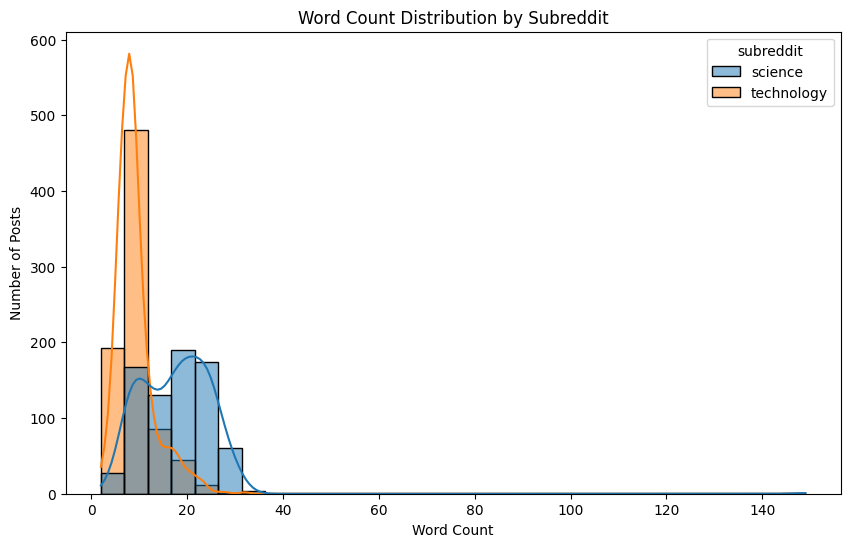

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='word_count', hue='subreddit', bins=30, kde=True)
plt.title('Word Count Distribution by Subreddit')
plt.xlabel('Word Count')
plt.ylabel('Number of Posts')
plt.show()

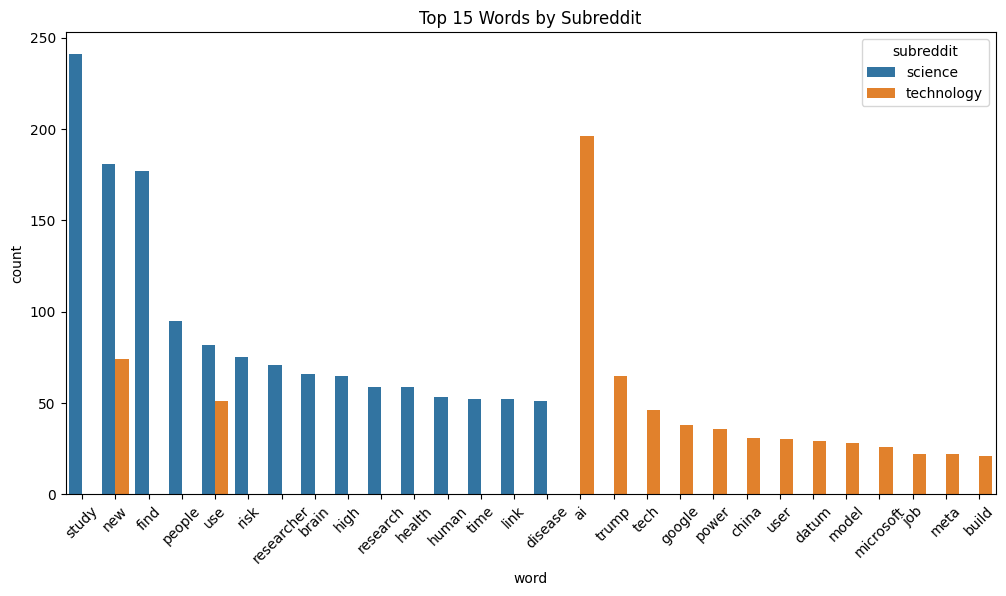

In [6]:
def top_words_by_group(group_df, n=15):
    words = ' '.join(group_df['processed_text']).split()
    return Counter(words).most_common(n)

# Get top words for each subreddit
science_top = top_words_by_group(df[df['subreddit'] == 'science'])
tech_top = top_words_by_group(df[df['subreddit'] == 'technology'])

# Turn into DataFrame for plotting
science_df = pd.DataFrame(science_top, columns=['word', 'count'])
science_df['subreddit'] = 'science'

tech_df = pd.DataFrame(tech_top, columns=['word', 'count'])
tech_df['subreddit'] = 'technology'

top_words_df = pd.concat([science_df, tech_df])

# Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_words_df, x='word', y='count', hue='subreddit')
plt.title('Top 15 Words by Subreddit')
plt.xticks(rotation=45)
plt.show()

In [7]:
# Generate text for each group
science_text = ' '.join(df[df['subreddit'] == 'science']['processed_text'])
tech_text = ' '.join(df[df['subreddit'] == 'technology']['processed_text'])

# Set up WordCloud config
wc = WordCloud(width=800, height=400, background_color='white', max_words=100)

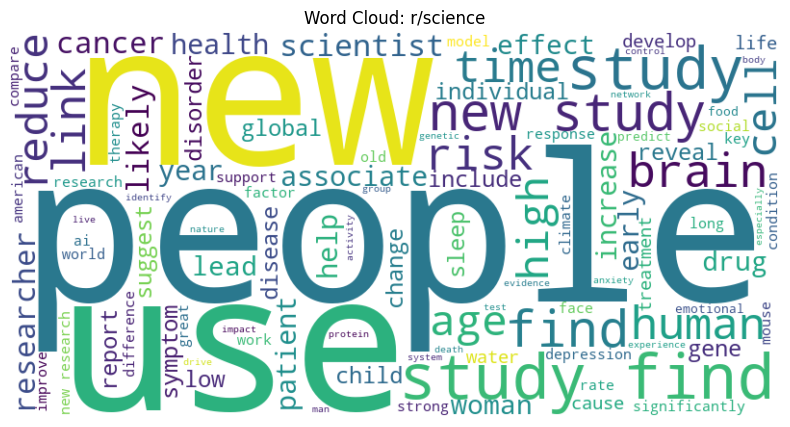

In [8]:
# Create and show science word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc.generate(science_text), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: r/science')
plt.show()

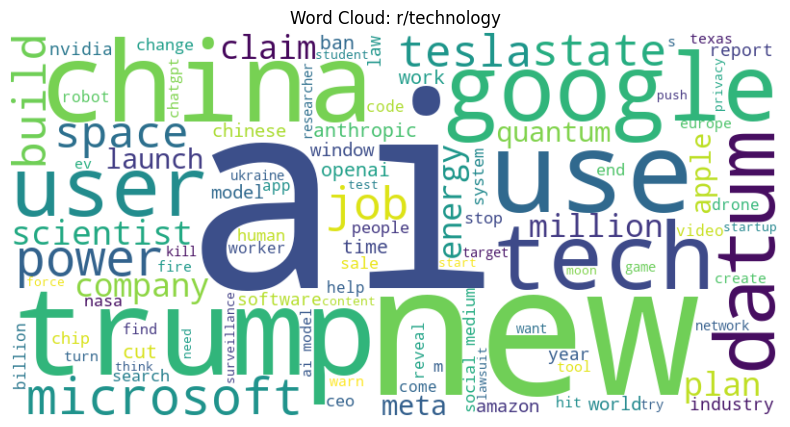

In [9]:
# Create and show technology word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc.generate(tech_text), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: r/technology')
plt.show()